#1. Darknet Clone


Runtime ==> GPU

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

#이거부터는 지워도 괜찮음.
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# verify CUDA
!/usr/local/cuda/bin/nvcc --version
# make darknet (builds darknet so that you can then use the darknet.py file and have your local changes inside darknet)
!make
# get yolov3 pretrained coco dataset weights


Cloning into 'darknet'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 14737 (delta 0), reused 0 (delta 0), pack-reused 14736
Receiving objects: 100% (14737/14737), 13.27 MiB | 24.36 MiB/s, done.
Resolving deltas: 100% (10025/10025), done.


In [2]:
!ls -al darknet

total 248
drwxr-xr-x 14 root root  4096 Mar 25 12:45 .
drwxr-xr-x  1 root root  4096 Mar 25 12:45 ..
drwxr-xr-x  4 root root  4096 Mar 25 12:45 3rdparty
drwxr-xr-x  3 root root  4096 Mar 25 12:45 build
-rwxr-xr-x  1 root root  7878 Mar 25 12:45 build.ps1
-rwxr-xr-x  1 root root  1960 Mar 25 12:45 build.sh
drwxr-xr-x  3 root root  4096 Mar 25 12:45 cfg
drwxr-xr-x  2 root root  4096 Mar 25 12:45 .circleci
drwxr-xr-x  3 root root  4096 Mar 25 12:45 cmake
-rw-r--r--  1 root root 21433 Mar 25 12:45 CMakeLists.txt
-rw-r--r--  1 root root  1373 Mar 25 12:45 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9467 Mar 25 12:45 darknet_images.py
-rw-r--r--  1 root root 10334 Mar 25 12:45 darknet.py
-rw-r--r--  1 root root  5227 Mar 25 12:45 darknet_video.py
drwxr-xr-x  3 root root  4096 Mar 25 12:45 data
drwxr-xr-x  8 root root  4096 Mar 25 12:45 .git
drwxr-xr-x  4 root root  4096 Mar 25 12:45 .github
-rw-r--r--  1 root root   588 Mar 25 12:45 .gitignore
-rwxr-xr-x  1 root root   110 Mar 25 12:45 i

In [3]:
%cd darknet

/content/darknet


In [4]:
!ls -al

total 248
drwxr-xr-x 14 root root  4096 Mar 25 12:45 .
drwxr-xr-x  1 root root  4096 Mar 25 12:45 ..
drwxr-xr-x  4 root root  4096 Mar 25 12:45 3rdparty
drwxr-xr-x  3 root root  4096 Mar 25 12:45 build
-rwxr-xr-x  1 root root  7878 Mar 25 12:45 build.ps1
-rwxr-xr-x  1 root root  1960 Mar 25 12:45 build.sh
drwxr-xr-x  3 root root  4096 Mar 25 12:45 cfg
drwxr-xr-x  2 root root  4096 Mar 25 12:45 .circleci
drwxr-xr-x  3 root root  4096 Mar 25 12:45 cmake
-rw-r--r--  1 root root 21433 Mar 25 12:45 CMakeLists.txt
-rw-r--r--  1 root root  1373 Mar 25 12:45 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9467 Mar 25 12:45 darknet_images.py
-rw-r--r--  1 root root 10334 Mar 25 12:45 darknet.py
-rw-r--r--  1 root root  5227 Mar 25 12:45 darknet_video.py
drwxr-xr-x  3 root root  4096 Mar 25 12:45 data
drwxr-xr-x  8 root root  4096 Mar 25 12:45 .git
drwxr-xr-x  4 root root  4096 Mar 25 12:45 .github
-rw-r--r--  1 root root   588 Mar 25 12:45 .gitignore
-rwxr-xr-x  1 root root   110 Mar 25 12:45 i

In [5]:
# change makefile to have GPU,OPENCV, CUDNN enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [6]:
#Compile Darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [7]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-25 12:47:08--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  35.3MB/s    in 7.2s    

2021-03-25 12:47:15 (32.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



#2. OpenCV YOLO Video

In [8]:
import cv2
import IPython
import numpy as np
import time
import math
from google.colab.patches import cv2_imshow

In [9]:
min_confidence = 0.5
weight_file = 'yolov3.weights'
cfg_file = 'cfg/yolov3.cfg'
name_file = 'data/coco.names'

file_name = 'cabc30fc-e7726578.mp4'

In [10]:
# Load YOLO
net = cv2.dnn.readNet(weight_file, cfg_file)

In [11]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [29]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [21]:
# cabc30fc-e7726578.mp4

from google.colab import files
files.upload()

{}

In [15]:
frame_count = 0
writer = None
output_name = 'output_video_car.avi'

In [16]:
def writeFrame(img):
    # use global variable, writer
    global writer
    height, width = img.shape[:2]
    if writer is None and output_name is not None:
        fourcc = cv2.VideoWriter_fourcc(*'MJPG')
        writer = cv2.VideoWriter(output_name, fourcc, 24, (width, height), True)
    if writer is not None:
        writer.write(img)

In [32]:
def detectAndDisplay(frame):
    # use global variable, writer
    global frame_count
    frame_count += 1
    start_time = time.time()
    IPython.display.clear_output(wait=True)
    height, width, channedls = frame.shape
    # Detecting objects
    # https://docs.opencv.org/master/d6/d0f/group__dnn.html
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            # Filter only car (2)
            if (confidence > min_confidence) and (class_id == 2):
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Region of Interest
    mask = np.zeros((height,width), dtype='uint8')
    poly_top = int(0.65 * height)
    poly_bottom = int(0.85 * height)
    poly_left = int(0.47 * width)
    poly_right = int(0.53 * width)
    roi_left = int(0.3 * width)
    roi_right = int(0.6 * width)
    poly_margin = 50
    polygons = np.array([[(0+poly_margin,poly_bottom), (poly_left, poly_top), (poly_right, poly_top), (width-poly_margin, poly_bottom)]])
    cv2.fillPoly(mask, polygons, 255)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX
    margin = 5
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            # Bitwise operation between box and mask 
            box = np.array([[(x-margin, y+h+margin), (x-margin, y-margin), (x+w+margin, y), (x+w+margin, y+h+margin)]])
            cv2.fillPoly(mask, box, 0) 
            # Eliminate Small object(<50)
            if (w > 50) and (x > roi_left) and (x < roi_right):
                label = str(classes[class_ids[i]])
                print(class_ids[i], label, w)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, label, (x, y + 30), font, 0.5, (0, 255, 0), 1) 

    #cv2_imshow(mask)
    # Lane Detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # GaussianBlur for refucing noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 40, 130)

    # Bitwise operation between poly and mask
    masked = cv2.bitwise_and(canny, mask)
    #cv2_imshow(masked)
    # Lane Detection
    lines = cv2.HoughLinesP(masked, 2, np.pi / 180, 20, np.array([]), 20, 10)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(frame, (x1,y1), (x2,y2), (0,  255, 255), 5)

    frame_time = time.time() - start_time 
    print("Frame {} time {}".format(frame_count, frame_time))
    cv2_imshow(frame)   
    writeFrame(frame)

2 car 177
Frame 1253 time 1.828047752380371


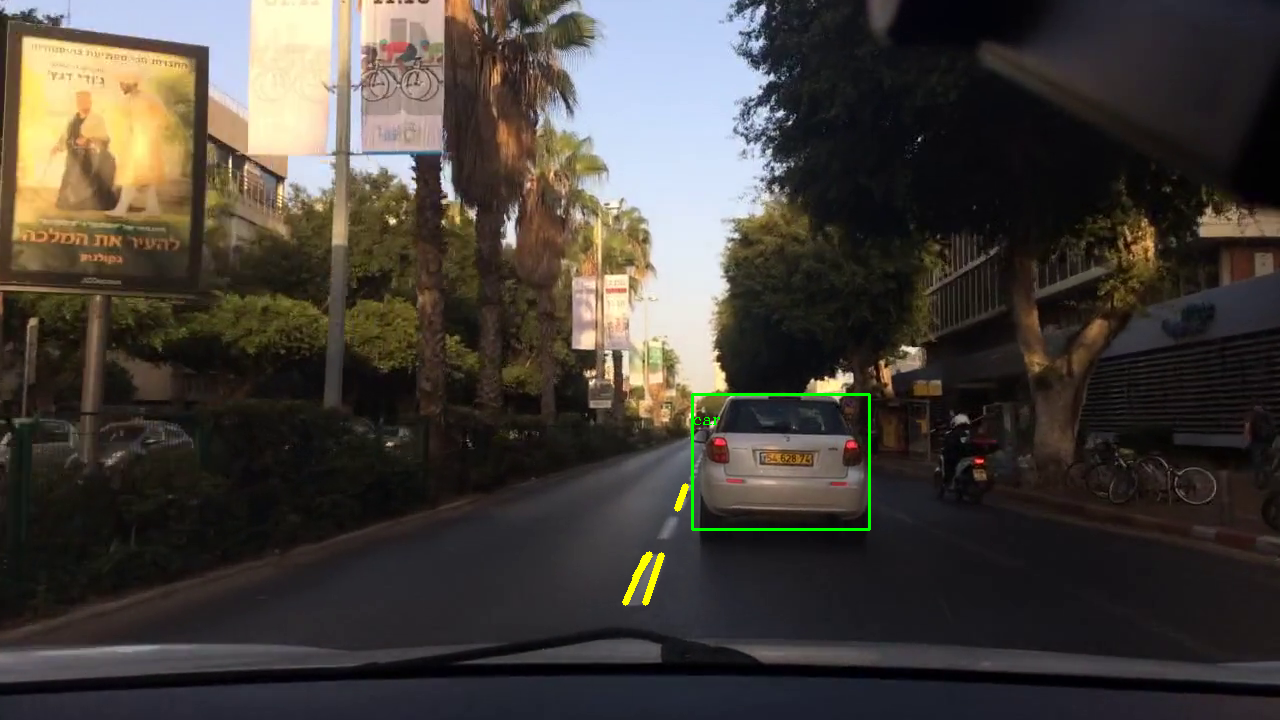

--(!) No captured frame -- Break!


In [33]:
#-- 2. Read the video stream
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)

In [35]:
from google.colab import files
files.download(output_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>